# <center>**Import Libraries/ Dependencies**</center>

In [1]:
from pathlib import Path

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.tree import DecisionTreeClassifier # imports for classification

# uncomment below if the runtime errors during the exploration and wrangling data get annoying
# import warnings
# warnings.filterwarnings("ignore", category=RuntimeWarning)

In [2]:
# Enforce Copy-on-Write
pd.set_option("mode.copy_on_write", True)

In [3]:
# this cell was necessary for Kaggle
# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <center>**Import Data Files**</center>

In [4]:
# set standard paths
cwd = Path().cwd() #set our cwd
project_folder = cwd.parent #set our project folder as the cwd parent
print(cwd, " ", project_folder)

f:\Code\CST577DataScience\ResearchProject\notebooks   f:\Code\CST577DataScience\ResearchProject


In [5]:
# import data on types of surveilance used by law enforcement agencies - muliple states
# Atlas of Surveillance website: https://www.atlasofsurveillance.org/data-library  
# data: https://www.atlasofsurveillance.org/download.csv
aos_path = Path('data/Atlas of Surveillance-20251114.csv') # using a data folder makes life easier
aos_file = project_folder / aos_path # join the project folder with the 
# dataset path
if not aos_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {aos_file}")
# store file in a dataframe
df_aos = pd.read_csv(aos_file)

In [6]:
# import data from Electronic Frontier Foundation on use of Automated License Plate Readers - multiple states
# EFF ALPR data website: https://www.eff.org/pages/automated-license-plate-reader-dataset
# data: https://www.eff.org/pages/download-alpr-dataset (zip file contains data in csv, xlx, defintitions and descriptions referenced below)
alpr_data_path = Path('data/EFF-MuckRock 2016-2017 ALPR DATA.csv') # using a data folder makes life easier
alpr_data_file = project_folder / alpr_data_path # join the project folder with the 
# dataset path
if not alpr_data_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {alpr_data_file}")
# store file in a dataframe
df_alpr_data = pd.read_csv(alpr_data_file)   

In [7]:
# import reference data from Electronic Frontier Foundation on use of Automated License Plate Readers - multiple states
# definitions of terms used
alpr_defs_path = Path('data/EFF-MuckRock 2016-2017 ALPR DATA - Definitions.csv') # using a data folder makes life easier
alpr_defs_file = project_folder / alpr_defs_path # join the project folder with the 
# dataset path
if not alpr_defs_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {alpr_defs_file}")
# store file in a dataframe
df_alpr_defs = pd.read_csv(alpr_defs_file)

# field descriptions
alpr_desc_path = Path('data/EFF-MuckRock 2016-2017 ALPR DATA - Field Descriptions.csv') # using a data folder makes life easier
alpr_desc_file = project_folder / alpr_desc_path # join the project folder with the 
# dataset path
if not alpr_desc_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {alpr_desc_file}")
# store file in a dataframe
df_alpr_desc = pd.read_csv(alpr_desc_file)

In [8]:
# import reference data from Electronic Frontier Foundation inventory on types of surveilance technologies used by border states
# Atlas of Surveillance: Southwestern Border Communities
# data: https://www.eff.org/pages/atlas-de-vigilancia-comunidades-fronterizas-del-suroeste
aos_brdr_path = Path('data/aos-bordercounties_-_01.10.2020.csv') # using a data folder makes life easier
aos_brdr_file = project_folder / aos_brdr_path # join the project folder with the 
# dataset path
if not aos_brdr_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {aos_brdr_file}")
# store file in a dataframe
df_aos_brdr = pd.read_csv(aos_brdr_file)

In [9]:
# import reference data from Electronic Frontier Foundation on types of surveilance used by campus police in colleges- multiple states
# Scholars Under Surveillance website: https://www.eff.org/deeplinks/2021/03/scholars-under-surveillance-how-campus-police-use-high-tech-spy-students
# data : https://www.eff.org/document/campus-police-surveillance-dataset
schol_srv_path = Path('data/scholars_unders_surveillance_dataset_03-03-2021.csv') # using a data folder makes life easier
schol_srv_file = project_folder / schol_srv_path # join the project folder with the 
# dataset path
if not schol_srv_file.exists():  # error catching in case the file is not found
	raise FileNotFoundError(f"Dataset file not found: {schol_srv_file}")
# store file in a dataframe
df_schol_srv = pd.read_csv(schol_srv_file)

# <center>**Explore Data / Data Wrangling**</center>

import data from Electronic Frontier Foundation on use of Automated License Plate Readers - multiple states

* First thing - opened files in Excel and did some clean up.  
* Filtered each column and scrolled through the unique/ filterable values Excel found.  
* Filled all blank values with an empty string to avoid NaN errors.  
* Changed full state name to two-letter state abbreviation for consistency across all State columns.  
* Removed invalid characters, spaces from column headers, changing them to PascalCase instead.
* AOS Data had some blank entries for counties.  Looked them up using Google. 
* Entered the Census area as county for AK cities that do not have an actual county. 
* Entered DC Metro Area as county for Washington DC
* Entered CityName (no county) for independent US cities not existing in a county (ex: St Louis, MO, Baltimore, MD)
* Separated multiple counties listed in one cell to multiple cells county1, county2..
* Checking for typos/ misspelled counties/ invalid characters



*Unintended bonus of uploading the data to kaggle- it provides preview tables and does some analysis on its own!*

### <center>**df_alpr_xxx** 
### Automated License Plate Reader Data
df_alpr_desc and df_alpr_defs are small dataframes that just supply reference information form the values and columns for the df_alpr_data database.
Display for reference

In [10]:
df_alpr_desc

,Agency,State,DirectSharing,NVLS,2016Detections,2016Hits,2017Detections,2017Hits,CombinedDetections,CombinedHits,AllTimeDetections,AllTimeHits,DataSharingLink,2016HitRatioReport,2017Hit RatioReport,2016DetectionReport,2016HitReport,2017DetectionReport,2017HitReport,CombinedDetectionHit Data
0,Name of agency,State where agency is located,Number of agencies listed on the Data Sharing ...,National Vehicle Location Service (sometimes r...,Total number of license plate scans (detection...,Total number of times in 2016 a scanned licens...,Number of license plate scans (detections) col...,Total number of times in 2017 a scanned licens...,"A * indicates incomplete data, often because t...","A * indicates incomplete data, often because t...",This field only includes agencies that provide...,This field only includes agencies that provide...,Link to the Data Sharing Report or similar rec...,"Link to the 2016 ""Hit Ratio Report"" or similar...","Link to the 2017 ""Hit Ratio Report"" or similar...","Link to the 2016 ""Detection Report"" or similar...","Link to the 2016 ""Hit Report"" or similar recor...","Link to the 2017 ""Detection Report"" or similar...","Link to the 2017 ""Hit Report"" or similar recor...",Link to documents that contain data for both d...
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Note: In most cases this figure was generated ...,Note: In most cases this figure was generated ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_alpr_defs

,Definitions,Unnamed: 1
0,NaN,Not applicable - refers to documents that woul...
1,Not Provided,Refers to when an agency failed to provided re...
2,Data Incomplete,Refers to when an agency provided incomplete d...


Take a peek at each dataset

In [12]:
# I want to explore the dataframe to visually scroll across the columns and see a sample of the values in the cells.
# I want to see all of the columns, so I am forcing pandas to show them all 
pd.set_option('display.max_columns', None)
df_alpr_data.head()

,Agency,State,DirectSharing,NVLS,2016Detections,2016Hits,2017Detections,2017Hits,2016To2017Detections,2016To2017Hits,AllTimeDetections,AllTimeHits,DataSharingLink,2016HitRatioReport,2017HitRatioReport,2016DetectionReport,2016HitReport,2017DetectionReport,2017HitReport,CombinedDetectionHit Data
0,Acworth Police Department,GA,270,Y,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,NaN,NaN,https://www.documentcloud.org/documents/494589...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alamo Heights Police Department,TX,14,Y,"1,034",Not Provided,"407,825",Not Provided,"408,859",0,NaN,NaN,https://www.documentcloud.org/documents/450163...,https://www.documentcloud.org/documents/455944...,https://www.documentcloud.org/documents/455944...,NaN,NaN,NaN,NaN,NaN
2,American Canyon Police Department,CA,27,Y,"786,289",271,"638,034",194,"1,424,323",465,NaN,NaN,https://www.documentcloud.org/documents/450164...,https://www.documentcloud.org/documents/455944...,https://www.documentcloud.org/documents/455944...,NaN,NaN,NaN,NaN,NaN
3,Atlanta Police Department,GA,8,NaN,Not Provided,Not Provided,"128,555,383","786,580","128,555,383*","786,580*",NaN,NaN,https://www.documentcloud.org/documents/450164...,NaN,NaN,NaN,NaN,NaN,NaN,https://www.documentcloud.org/documents/455944...
4,Auburn Police Department,CA,68,Y,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,Not Provided,NaN,NaN,https://www.documentcloud.org/documents/480202...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This file provides data specifically about Automated License Plate Reader usage.  It provides the # of detections and "hits" in 2016 and 2017 by agency and state.  It also provides the number of agencies to which the data is shared. 

**Each row of <u>df_alpr_data</u> represents the datasharing details for one agency.**

Is the data sharing link missing for any records? 

In [13]:
df_alpr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Agency                     200 non-null    object
 1   State                      200 non-null    object
 2   DirectSharing              200 non-null    object
 3   NVLS                       132 non-null    object
 4   2016Detections             177 non-null    object
 5   2016Hits                   177 non-null    object
 6   2017Detections             190 non-null    object
 7   2017Hits                   190 non-null    object
 8   2016To2017Detections       198 non-null    object
 9   2016To2017Hits             198 non-null    object
 10  AllTimeDetections          3 non-null      object
 11  AllTimeHits                4 non-null      object
 12  DataSharingLink            188 non-null    object
 13  2016HitRatioReport         67 non-null     object
 14  2017HitRat

I couldnt read the full description of the NVLS file. What is it? 

In [14]:
df_alpr_desc['NVLS'][0]    

'National Vehicle Location Service (sometimes referred to as the National Vehicle Locator System) is a pool of data shared among hundreds of agencies, the identities of which are not disclosed A "Y" in this field indicates the agency is sending its data to the NVLS pool. '

In [15]:
df_alpr_data['NVLS'].value_counts()

NVLS
Y               130
N                 1
Not Provided      1
Name: count, dtype: int64

In [16]:
df_alpr_agencies = df_alpr_data['Agency'].unique()
df_alpr_agencies

array(['Acworth Police Department', 'Alamo Heights Police Department',
       'American Canyon Police Department', 'Atlanta Police Department',
       'Auburn Police Department', 'Austin Police Department',
       'Austin Regional Intelligence Center',
       'Bakersfield Police Department', 'Ball Ground Police Department',
       "Banks County Sheriff's Office", 'Beachwood Police Department',
       'Bell Gardens Police Department', 'Bell Police Department',
       'Bernardsville Police Department',
       'Beverly Hills Police Department', 'Blairsville Police Department',
       'Blue Mound Police Department', "Bossier Parish Sheriff's Office",
       'Brea Police Department', 'Brentwood Police Department',
       'Bristol Township Police Department\n',
       "Broome County Sheriff's Office", 'Buena Park Police Department',
       'Buffalo Police Department', 'Burbank Police Department',
       'Burr Ridge Police Department', 'Byron Police Department',
       'California Department 

It looks like there are 200 records, of which 188 have a link to their Data Sharing Data.  In ADDITION, 130 agencies send to NVLS, which does not disclose the agencies it further shares with.

*This may be an interesting exploration - where does your data go?*  

But with NVLS not giving full disclosure, this exploration would be incomplete

### <center>**df_aos** 
### Atlas of Surveilance Data

In [17]:
df_aos.head()

,AOSNUMBER,City,Counties,County1,County2,County3,County4,County5,County6,County7,State,Agency,TypeOfLEA,Summary,TypeOfJuris,Technology,Vendor,Link1,Link1Snapshot,Link1Source,Link1Type,Link1Date,Link1DateComment,Link 2,Link2Snapshot,Link2Source,Link2Type,Link2Date,Link2DateComment,Link3,Link3Snapshot,Link3Source,Link3Type,Link3Date,OtherLinks
0,AOS002987,Anchorage,Anchorage Borough,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,AK,Anchorage Police Department,Police,The Anchorage Police Department operates drone...,Municipal,Drones,NaN,https://www.anchoragepolice.com/news/fatality-...,NaN,Anchorage Police Department,,,,https://dronecenter.bard.edu/files/2020/04/CSD...,,Center for the Study of the Drone at Bard College,,7/12/1905,,https://www.muni.org/Departments/Assembly/Docu...,,www.muni.org,,,
1,AOS004259,Anchorage,Anchorage Borough,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,AK,Alaska Information and Analysis Center,Fusion Center,The Alaska Information and Analysis Center is ...,Statewide,Fusion Center,NaN,https://www.dhs.gov/fusion-center-locations-an...,NaN,U.S. Department of Homeland Security,,,,https://www.eff.org/deeplinks/2014/04/why-fusi...,,Electronic Frontier Foundation,,4/7/2014,,https://www.openthegovernment.org/dhs-fusion-c...,,Open the Government,,4/2/2020,
2,AOS006868,Anchorage,Anchorage Borough,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,AK,Alaska Division of Motor Vehicles,DMV,The Alaska Division of Motor Vehicles responds...,Statewide,Face Recognition,NaN,https://whohasyourface.eff.org/resources/,NaN,Electronic Frontier Foundation,,,,,,,,,,,,,,,
3,AOS007456,Anchorage,Anchorage Borough,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,AK,Anchorage Police Department,Police,The Anchorage Police Department acquired cell-...,Municipal,Cell-site Simulator,NaN,https://www.adn.com/alaska-news/anchorage/2016...,NaN,Anchorage Daily News,,,,http://www.muni.org/Departments/Assembly/Clerk...,,Municipality of Anchorage,,7/21/2009,,https://www.ktuu.com/content/news/Anchorage-po...,,2KTUU,,8/18/2016,
4,AOS013830,Anchorage,Anchorage Borough,Anchorage Borough,NaN,NaN,NaN,NaN,NaN,NaN,AK,Anchorage Police Department,Police,The Anchorage Police Department uses Axon body...,Municipal,Body-worn Cameras,Axon,https://www.alaskasnewssource.com/2023/08/10/a...,NaN,Alaska's News Source,,8/9/2023,,https://www.alaskasnewssource.com/2023/08/25/r...,,Alaska's News Source,,8/24/2023,,https://www.anchoragepolice.com/news/body-worn...,,Anchorage Police Department Website,,10/3/2023,


In [18]:
df_aos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15045 entries, 0 to 15044
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   AOSNUMBER         15045 non-null  object 
 1   City              15043 non-null  object 
 2   Counties          15045 non-null  object 
 3   County1           15045 non-null  object 
 4   County2           655 non-null    object 
 5   County3           327 non-null    object 
 6   County4           198 non-null    object 
 7   County5           118 non-null    object 
 8   County6           13 non-null     object 
 9   County7           7 non-null      object 
 10  State             15045 non-null  object 
 11  Agency            15045 non-null  object 
 12  TypeOfLEA         15045 non-null  object 
 13  Summary           15045 non-null  object 
 14  TypeOfJuris       15045 non-null  object 
 15  Technology        15045 non-null  object 
 16  Vendor            7913 non-null   object

What does one row represent? 

In [19]:
aos_states = df_aos['State'].unique()
aos_cities = df_aos['City'].unique()
aos_counties = df_aos['Counties'].unique()
aos_agencies = df_aos['Agency'].unique()
aos_techs = df_aos['Technology'].unique()
aos_LEAs = df_aos['TypeOfLEA'].unique()

num_aos_states = (len(aos_states))
num_aos_cities = (len(aos_cities))
num_aos_counties = (len(aos_counties))
num_aos_agencies = (len(aos_agencies))
num_aos_techs = (len(aos_techs))
num_aos_LEAs = (len(aos_LEAs))

In [20]:

print(num_aos_techs)
print(aos_techs)

12
['Drones' 'Fusion Center' 'Face Recognition' 'Cell-site Simulator'
 'Body-worn Cameras' 'Automated License Plate Readers'
 'Predictive Policing' 'Real-Time Crime Center' 'Gunshot Detection'
 'Camera Registry' 'Third-party Investigative Platforms' 'Video Analytics']


In [21]:
print(num_aos_agencies)
print(aos_agencies)

7611
['Anchorage Police Department' 'Alaska Information and Analysis Center'
 'Alaska Division of Motor Vehicles' ... 'Jackson Hole Police Department'
 "Uinta County Sheriff's Office" "Washakie County Sheriff's Office"]


In [22]:
print(num_aos_LEAs)
print(aos_LEAs)

49
['Police' 'Fusion Center' 'DMV' 'State Police/Highway Patrol' 'Sheriff'
 'Corrections' 'Environmental Services Enforcement' 'Fish and Game'
 "Prosecutor's Office" 'Marshal' 'District Attorney'
 'Customs and Border Protection' 'Park Rangers' 'Transit Police'
 'Attorney General' 'Parking Enforcement' 'Probation/Parole'
 'DIstrict Attorney' 'Multi-jurisdiction' 'Parks' 'Rangers'
 'Treasury/Finance' 'Fish and Wildlife' 'Juvenile' 'Highway Authority'
 'Medical Examiner' 'Natural Resources' 'Emergency Services'
 'State police' 'Transit' 'Task Force' 'Security' 'Court' 'State Patrol'
 'Public Safety' 'Alcoholic Beverage Control' 'Prosecutor' 'Dispatch'
 'Homeland Security' 'State-Local Partnership' 'Water District'
 'State Police' 'State Agency' 'Health Department' 'Forest Service'
 'Constables' 'Drug Enforcement' 'Fire Marshal' 'Animal Control']


So in df_aos we have information on the type of surveilance technology used by a law enforcement agency, with information on the law enforcement agency, its juristication, city, county, and state, as well as reference information in the form of text, links, and a summary text. 

 **Each row in <u>df_aos</u> is one technology used by an agency in the County, City, and State indicated**

### <center>**df_aos_brdr** 
### Atlas of Surveilance Border Counties Surveilance Data

In [23]:
df_aos_brdr.head()

,RefNo,Agency,City,County,State,LEAType,JurisdictionType,TechnologyType,Vendor,Summary,PrimaryLink,ArchivedPrimaryLink,DocumentType,Source,DocumentDate,Unnamed: 15,AdditionalLink1,AdditionalLink2,AdditionalLink3,ArchivedAdditionalLink1,AdditionalArchivedLink2,AdditionalArchivedLink3,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,AZCOC010,Cochise County Sheriff's Office,Bisbee,Cochise County,AZ,Sheriff,County,Body-worn Cameras,Axon,The Cochise County Sheriff's office received a...,http://agenda.cochise.az.gov/agenda_publish.cf...,http://web.archive.org/web/20190820224316/http...,Info on a government website,Cochise Website,3/26/2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AZCOC014,Cochise County Sheriff's Office,Bisbee,Cochise County,AZ,Sheriff,County,Camera Network,Cogniac,"In 2016, the Cochise County Sheriff’s Office b...",https://www.documentcloud.org/documents/635342...,http://web.archive.org/web/20190820224326/http...,Public Records,Cochise County Sheriff's Office,12/4/2017,NaN,https://web.archive.org/web/*/https://theinter...,NaN,NaN,https://www.documentcloud.org/documents/635343...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AZCOC001,Cochise County Sheriff's Office,Bisbee,Cochise County,AZ,Sheriff,County,Cell-site Simulators,NaN,While the Cochise County Sheriff’s Office does...,https://www.documentcloud.org/documents/500204...,https://www.documentcloud.org/documents/500204...,Court Records,Bisbee Justice Court,5/3/2018,NaN,https://www.documentcloud.org/documents/500205...,NaN,NaN,https://www.documentcloud.org/documents/500205...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AZCOC012,Cochise County Sheriff's Office,Bisbee,Cochise County,AZ,Sheriff,County,Drones,Lockheed Martin,"In 2014, the Cochise County Sheriff's Office r...",http://agenda.cochise.az.gov/mindocs/2014/BOS/...,http://web.archive.org/web/20190820224323/http...,Public Records,Cochise County Board of Supervisors Meeting,4/8/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AZCOC003,Cochise County Sheriff's Office,Bisbee,Cochise County,AZ,Sheriff,County,Starchase,Starchase,"In 2012, the Arizona Department of Public Safe...",http://agenda.cochise.az.gov/agenda_publish.cf...,http://web.archive.org/web/20190820224311/http...,Info on a government website,Cochise County Board of Supervisors Meeting,6/12/2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
df_aos_brdr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   RefNo                    207 non-null    object 
 1   Agency                   207 non-null    object 
 2   City                     207 non-null    object 
 3   County                   207 non-null    object 
 4   State                    207 non-null    object 
 5   LEAType                  207 non-null    object 
 6   JurisdictionType         207 non-null    object 
 7   TechnologyType           207 non-null    object 
 8   Vendor                   89 non-null     object 
 9   Summary                  207 non-null    object 
 10  PrimaryLink              207 non-null    object 
 11  ArchivedPrimaryLink      204 non-null    object 
 12  DocumentType             204 non-null    object 
 13  Source                   204 non-null    object 
 14  DocumentDate             1

In [25]:
brdr_states = df_aos_brdr['State'].unique()
brdr_cities = df_aos_brdr['City'].unique()
brdr_counties = df_aos_brdr['County'].unique()
brdr_agencies = df_aos_brdr['Agency'].unique()
brdr_techs = df_aos_brdr['TechnologyType'].unique()
brdr_LEAs = df_aos_brdr['LEAType'].unique()

num_brdr_states = (len(brdr_states))
num_brdr_cities = (len(brdr_cities))
num_brdr_counties = (len(brdr_counties))
num_brdr_agencies = (len(brdr_agencies))
num_brdr_techs = (len(brdr_techs))
num_brdr_LEAs = (len(brdr_LEAs))

In [26]:
print(num_brdr_techs)
print(brdr_techs)

31
['Body-worn Cameras' 'Camera Network' 'Cell-site Simulators' 'Drones'
 'Starchase' 'Tethered Aerostat Radar System' 'Face recognition'
 'Automated License Plate Readers' 'Artificial Intelligence'
 'Camera Registry' 'Real-Time Crime Centers' 'Integrated Fixed Towers'
 'Mobile Surveillance Vehicle' 'Unattended Ground Sensors'
 'Smart Streetlights' 'Remote Video Surveillance Systems' 'Ring/Neighbors'
 'Face Recognition' 'Fusion Center' 'Gunshot detection'
 'Surveillance Trailer' 'Surveillance Towers' 'Iris scanning'
 'Automated License Plate Readers/Camera Network' 'Spy Plane'
 'Automated License Plate Readers/Surveillance Trailer' 'Pole Cameras'
 'Predictive Policing' 'Tactical Aerostat' 'Lidar'
 'Camera Networks/Real-Time Crime Centers']


In [27]:
print(num_brdr_agencies)
print(brdr_agencies)

96
["Cochise County Sheriff's Office" 'Fort Huachuca Military Police'
 'Huachuca City Police' 'Sierra Vista Police Department'
 "Tombstone Marshal's Office" 'U.S. Army Fort Huachuca'
 'U.S. Customs and Border Protection'
 'Arizona Department of Public Safety'
 'Arizona Department of Transportation' 'Drug Enforcement Administration'
 'Marana Police Department' 'Oro Valley Police Department'
 "Pima County Sheriff's Department" 'Sahuarita Police Department'
 'South Tucson Police Department' 'Tucson Police Department'
 'U.S. Border Patrol: Tucson Secto' 'Nogales Police Department'
 'City of Yuma' 'U.S. Border Patrol: Yuma Sector'
 "Yuma County Sheriff's Office" 'Yuma Police Department'
 'Calexico Police Department' 'El Centro Police Department'
 "Imperial County Sheriff's Office" 'U.S. Border Patrol: El Centro Sector'
 'California State University San Marcos Police Department'
 'Carlsbad Police Department' 'Chula Vista Police Department'
 'Coronado Police Department' 'El Cajon Police Depar

In [28]:
print(num_brdr_LEAs)
print(brdr_LEAs)

11
['Sheriff' 'Military Police' 'Police' 'Marshal ' 'Federal agency' 'State'
 'Task force/other joint agency' 'Federal Agency'
 'Fire Department/Emergency Services' 'State agency ' 'Police ']


 **Each row in <u>df_aos_brdr</u> is one technology used by an agency in the County, City, and State indicated, only counties that border the US/Mexican border are included**

### <center>**df_schol_srv** 
### Atlas of Surveilance On Campus Agency Surveilance Data

In [29]:
df_schol_srv.head()

,Ref,Agency,City,County,State,TypeofLEA,TypeofJuris,Technology,Vendor,Summary,Link1,Link1Source,Link1Date,Link1DateComment,Link1Type,Link2,Link2Source,Link2Date,Link2DateComment,Link2Type,Link3,Link3Source,Link3Date,Link3DateComment,Link3Type,OtherLinks
0,EDU001,Abraham Baldwin Agricultural College Police De...,Tifton,Tift County,GA,Police,University,Body-worn Cameras,NaN,The Abraham Baldwin Agricultural College Polic...,https://www.ajc.com/news/local-education/colle...,The Atlanta Journal-Constitution,11/4/2016,NaN,News article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,EDU002,Agnes Scott College Department of Public Safety,Decatur,DeKalb County,GA,Police,University,Body-worn Cameras,Axon,Police officers with the Agnes Scott College D...,https://www.facebook.com/ASCPolice/photos/pcb....,Agnes Scott College Police Facebook page,8/30/2019,NaN,Social media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,EDU003,Albany State University Police Department,Albany,Dougherty County,GA,Police,University,Body-worn Cameras,NaN,The Albany State University Police Department ...,https://www.asurams.edu/docs/legal-affairs/pol...,Albany State University Police Departement,16-Oct,NaN,Policy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EDU004,Arizona State University Police Department,Tempe,Maricopa County,AZ,Police,University,Body-worn Cameras,NaN,The Arizona State University Police Department...,https://www.phoenixnewtimes.com/news/asu-polic...,Phoenix New Times,11/6/2015,NaN,News article,https://www.facebook.com/ASUPolice/photos/a.85...,ASU Police Department Facebook page,1/31/2020,NaN,Social media,NaN,NaN,NaN,NaN,NaN,NaN
4,EDU005,Arkansas State University Police Department,Jonesboro,Craighead County,AR,Police,University,Body-worn Cameras,NaN,The Arkansas State University Police Departmen...,https://www.nwaonline.com/news/2015/oct/24/pol...,Northwest Arkansas Democrat Gazette,10/25/2015,NaN,News article,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df_schol_srv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Ref               251 non-null    object 
 1   Agency            251 non-null    object 
 2   City              251 non-null    object 
 3   County            246 non-null    object 
 4   State             251 non-null    object 
 5   TypeofLEA         251 non-null    object 
 6   TypeofJuris       251 non-null    object 
 7   Technology        251 non-null    object 
 8   Vendor            93 non-null     object 
 9   Summary           251 non-null    object 
 10  Link1             251 non-null    object 
 11  Link1Source       250 non-null    object 
 12  Link1Date         229 non-null    object 
 13  Link1DateComment  2 non-null      object 
 14  Link1Type         251 non-null    object 
 15  Link2             78 non-null     object 
 16  Link2Source       77 non-null     object 
 1

Is this one row per Technology Type per agency as with the others, or is one row one university? 

In [31]:
schol_states = df_schol_srv['State'].unique()
schol_cities = df_schol_srv['City'].unique()
schol_counties = df_schol_srv['County'].unique()
schol_agencies = df_schol_srv['Agency'].unique()
schol_techs = df_schol_srv['Technology'].unique()
schol_LEAs = df_schol_srv['TypeofLEA'].unique()

num_schol_states = (len(schol_states))
num_schol_cities = (len(schol_cities))
num_schol_counties = (len(schol_counties))
num_schol_agencies = (len(schol_agencies))
num_schol_techs = (len(schol_techs))
num_schol_LEAs = (len(schol_LEAs))

In [32]:
print(num_schol_techs)
print(schol_techs)

8
['Body-worn Cameras' 'Automated License Plate Readers' 'Drones'
 'Social Media Monitoring' 'Gunshot Detection' 'Face Recognition'
 'Video Analytics' 'Camera Registry']


In [33]:
print(num_schol_agencies)
print(schol_agencies)

215
['Abraham Baldwin Agricultural College Police Department'
 'Agnes Scott College Department of Public Safety'
 'Albany State University Police Department'
 'Arizona State University Police Department'
 'Arkansas State University Police Department' 'Arkansas Tech University'
 'Atlanta Metropolitan State College Police Department'
 'Binghamton University Police Department'
 'Bowling Green State University Parking and Shuttle Services'
 'Brigham Young University Police Department'
 'Cal Poly State University Police Department'
 'Cal State Monterey University Police Department'
 'California State Polytechnic Pomona University Police Department'
 'California State University Fullerton Police Department'
 'California State University Northridge Police Department'
 'California State University San Marcos Police Department'
 'California State University, Long Beach Police Department'
 'California State University, Northridge Police Department'
 'Central Connecticut State University Police D

In [34]:
print(num_schol_LEAs)
print(schol_LEAs)

4
['Police' 'Parking Enforcement' 'Public Safety' 'Police ']


Since value counts shows counts greater than one, we do not have one row per university. It appears to match one technology per agency as the others. 


 **Each row in <u>df_schol_srv</u> is one technology used by a University Agency in the County, City, and State indicated**

The schol srv dataframe contains similar data as the AOS dataframe - Agency, City, County, State, and Type of Surveilance Technology used, along with reference links and text summary. If we were to merge these, will be still de able to decipher which data was from the colleges? 

In [35]:
schol_juris = df_schol_srv['TypeofJuris'].unique()
num_schol_juris = (len(schol_juris))

aos_juris = df_aos['TypeOfJuris'].unique()
num_aos_juris = (len(aos_juris))

print('Scholar Juristictions ', num_schol_juris, " ", schol_juris, '\n\nAOS Jurisdictions ', num_aos_juris, " ", aos_juris)




Scholar Juristictions  2   ['University' 'University '] 

AOS Jurisdictions  28   ['Municipal' 'Statewide' 'County' 'University' 'Tribal' 'Airport'
 'Transit' 'Regional' 'Federal' 'Port' 'Judicial District'
 'School District' 'Harbor' 'State' 'Railroad' 'Special District'
 'Territory' 'Multiple' 'Parks' 'Forest' 'Park District' 'Conservation'
 'Parish' 'Hospital' 'Police' 'Housing Authority' 'Health System'
 'Water District']


AOS df appears to have University Data.  Additionally, aof_schol_srv thinks it had two types of Jurisdiction because of trailing spaces.  Fixing this by removing leading and trailing spaces.

Rename TypeofJuris to TypeOfJuris to for continuity in naming convention and across dataframes.

In [36]:
# remove trailing spaces from they Type of Jurisdiction values in the scholar dataset
df_schol_srv['TypeofJuris'] = df_schol_srv['TypeofJuris'].str.strip()
# rename the TypeofJuris column in the scholar data set, capitalizing the "o" in "of" for a standardized column name
df_schol_srv = df_schol_srv.rename(columns = {'TypeofJuris' : 'TypeOfJuris'})
df_schol_srv.head(0)

,Ref,Agency,City,County,State,TypeofLEA,TypeOfJuris,Technology,Vendor,Summary,Link1,Link1Source,Link1Date,Link1DateComment,Link1Type,Link2,Link2Source,Link2Date,Link2DateComment,Link2Type,Link3,Link3Source,Link3Date,Link3DateComment,Link3Type,OtherLinks


I just want to look at the column headers next to eachother so I can compare and see what data we have across multple dfs and see what other column name cleanup I need to do

In [37]:
df_alpr_data.head(0)

,Agency,State,DirectSharing,NVLS,2016Detections,2016Hits,2017Detections,2017Hits,2016To2017Detections,2016To2017Hits,AllTimeDetections,AllTimeHits,DataSharingLink,2016HitRatioReport,2017HitRatioReport,2016DetectionReport,2016HitReport,2017DetectionReport,2017HitReport,CombinedDetectionHit Data


In [38]:
df_aos.head(0)

,AOSNUMBER,City,Counties,County1,County2,County3,County4,County5,County6,County7,State,Agency,TypeOfLEA,Summary,TypeOfJuris,Technology,Vendor,Link1,Link1Snapshot,Link1Source,Link1Type,Link1Date,Link1DateComment,Link 2,Link2Snapshot,Link2Source,Link2Type,Link2Date,Link2DateComment,Link3,Link3Snapshot,Link3Source,Link3Type,Link3Date,OtherLinks


In [39]:
df_aos_brdr.head(0)

,RefNo,Agency,City,County,State,LEAType,JurisdictionType,TechnologyType,Vendor,Summary,PrimaryLink,ArchivedPrimaryLink,DocumentType,Source,DocumentDate,Unnamed: 15,AdditionalLink1,AdditionalLink2,AdditionalLink3,ArchivedAdditionalLink1,AdditionalArchivedLink2,AdditionalArchivedLink3,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28


In [40]:
df_schol_srv.head(0)

,Ref,Agency,City,County,State,TypeofLEA,TypeOfJuris,Technology,Vendor,Summary,Link1,Link1Source,Link1Date,Link1DateComment,Link1Type,Link2,Link2Source,Link2Date,Link2DateComment,Link2Type,Link3,Link3Source,Link3Date,Link3DateComment,Link3Type,OtherLinks


All but the alpr dataframe have similar columns.  It looks like there is a little inconsistency in some of the column names, though. 
Particularly the column that holds the type of Law Enforcement Agecy, the Type of Jurisdiction and the column that holds the type of Technology.  
We are going to standardize the names to TypeOfLEA, TypeOfJuris, and Technology.

In [41]:
#aos_brdr dataframe
# rename the columns that need to be changed to the standardized names
df_aos_brdr = df_aos_brdr.rename(columns = {'LEAType' : 'TypeOfLEA', 'JurisdictionType' : 'TypeOfJuris', 'TechnologyType' : 'Technology'})

#scholar dataframe
# rename nonstandard column
df_schol_srv = df_schol_srv.rename(columns = {'TypeofLEA' : 'TypeOfLEA'})

In [42]:
df_aos_brdr.head(0)

,RefNo,Agency,City,County,State,TypeOfLEA,TypeOfJuris,Technology,Vendor,Summary,PrimaryLink,ArchivedPrimaryLink,DocumentType,Source,DocumentDate,Unnamed: 15,AdditionalLink1,AdditionalLink2,AdditionalLink3,ArchivedAdditionalLink1,AdditionalArchivedLink2,AdditionalArchivedLink3,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28


In [43]:
df_schol_srv.head(0)

,Ref,Agency,City,County,State,TypeOfLEA,TypeOfJuris,Technology,Vendor,Summary,Link1,Link1Source,Link1Date,Link1DateComment,Link1Type,Link2,Link2Source,Link2Date,Link2DateComment,Link2Type,Link3,Link3Source,Link3Date,Link3DateComment,Link3Type,OtherLinks


# <center>**Analysis**

Looking at the AOS data, many of the columns are text and long text that would not be relevant to our analysis, as they are discriptive summaries and URL Links. <br>
Also, the border data and university data are one-county per row, but the aos data has multiple counties listed in some cases, but one city per row, so it would seem that this is when some states span multiple counties.<br>
The breakdown of these cities by county is not given.  Since city is a more granular measure, we will retain that and drop the County column.<br>
The columns in common that we are interested in are: Agency, City, State, Type of Law Enforcement Agency, Type of Jurisdiction, Technology, and Vendor.<br>
We will standardize these columns as Agency, City, State, TypeOfLEA, TypeOfJuris, Technology, and Vendor, in that order. 

In [44]:
#new order of columns
new_order = ['Agency', 'City', 'State', 'TypeOfLEA', 'TypeOfJuris', 'Technology', 'Vendor']

#AOS dataframe 
df_aos_sm = df_aos[new_order]

#aos_brdr dataframe
# reorder them
df_aos_brdr_sm = df_aos_brdr[new_order]

# scholar dataframe
# reorder them
df_schol_srv_sm = df_schol_srv[new_order]

In [45]:
df_aos_sm.head(2)

,Agency,City,State,TypeOfLEA,TypeOfJuris,Technology,Vendor
0,Anchorage Police Department,Anchorage,AK,Police,Municipal,Drones,NaN
1,Alaska Information and Analysis Center,Anchorage,AK,Fusion Center,Statewide,Fusion Center,NaN


In [46]:
df_aos_brdr_sm.head(2)

,Agency,City,State,TypeOfLEA,TypeOfJuris,Technology,Vendor
0,Cochise County Sheriff's Office,Bisbee,AZ,Sheriff,County,Body-worn Cameras,Axon
1,Cochise County Sheriff's Office,Bisbee,AZ,Sheriff,County,Camera Network,Cogniac


In [47]:
df_schol_srv_sm.head(2)

,Agency,City,State,TypeOfLEA,TypeOfJuris,Technology,Vendor
0,Abraham Baldwin Agricultural College Police De...,Tifton,GA,Police,University,Body-worn Cameras,NaN
1,Agnes Scott College Department of Public Safety,Decatur,GA,Police,University,Body-worn Cameras,Axon


Stack these all together now so we can further analyze it all together as one

In [48]:
df_aos_combined = pd.concat([df_aos_sm, df_aos_brdr_sm, df_schol_srv_sm], ignore_index=True)

In [49]:
df_aos_combined

,Agency,City,State,TypeOfLEA,TypeOfJuris,Technology,Vendor
0,Anchorage Police Department,Anchorage,AK,Police,Municipal,Drones,NaN
1,Alaska Information and Analysis Center,Anchorage,AK,Fusion Center,Statewide,Fusion Center,NaN
2,Alaska Division of Motor Vehicles,Anchorage,AK,DMV,Statewide,Face Recognition,NaN
3,Anchorage Police Department,Anchorage,AK,Police,Municipal,Cell-site Simulator,NaN
4,Anchorage Police Department,Anchorage,AK,Police,Municipal,Body-worn Cameras,Axon
...,...,...,...,...,...,...,...
15498,University of Wyoming Police Department,Laramie,WY,Police,University,Body-worn Cameras,NaN
15499,University Park Police Department,University Park,MD,Police,University,Body-worn Cameras,Axon
15500,"Universty of Californa, Davis Police Department",Davis,CA,Police,University,Body-worn Cameras,NaN
15501,Virginia Commonwealth University Parking and T...,Richmond,VA,Parking Enforcement,University,Automated License Plate Readers,NaN


Let's look at the unique values for the Technology, State, and Type of Law Enforcement, since our analysis is going to be considering those specifically

In [50]:
comb_techs = df_aos_combined['Technology'].unique()
num_comb_techs = len(comb_techs)
print(num_comb_techs, " ", comb_techs)

37   ['Drones' 'Fusion Center' 'Face Recognition' 'Cell-site Simulator'
 'Body-worn Cameras' 'Automated License Plate Readers'
 'Predictive Policing' 'Real-Time Crime Center' 'Gunshot Detection'
 'Camera Registry' 'Third-party Investigative Platforms' 'Video Analytics'
 'Camera Network' 'Cell-site Simulators' 'Starchase'
 'Tethered Aerostat Radar System' 'Face recognition'
 'Artificial Intelligence' 'Real-Time Crime Centers'
 'Integrated Fixed Towers' 'Mobile Surveillance Vehicle'
 'Unattended Ground Sensors' 'Smart Streetlights'
 'Remote Video Surveillance Systems' 'Ring/Neighbors' 'Gunshot detection'
 'Surveillance Trailer' 'Surveillance Towers' 'Iris scanning'
 'Automated License Plate Readers/Camera Network' 'Spy Plane'
 'Automated License Plate Readers/Surveillance Trailer' 'Pole Cameras'
 'Tactical Aerostat' 'Lidar' 'Camera Networks/Real-Time Crime Centers'
 'Social Media Monitoring']


In [51]:
comb_states = df_aos_combined['State'].unique()
num_comb_states = len(comb_states)
print(num_comb_states, " ", comb_states)

54   ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NE' 'NC' 'ND' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


In [52]:
comb_LEAs = df_aos_combined['TypeOfLEA'].unique()
num_comb_LEAs = len(comb_LEAs)
print(num_comb_LEAs, " ", comb_LEAs)

58   ['Police' 'Fusion Center' 'DMV' 'State Police/Highway Patrol' 'Sheriff'
 'Corrections' 'Environmental Services Enforcement' 'Fish and Game'
 "Prosecutor's Office" 'Marshal' 'District Attorney'
 'Customs and Border Protection' 'Park Rangers' 'Transit Police'
 'Attorney General' 'Parking Enforcement' 'Probation/Parole'
 'DIstrict Attorney' 'Multi-jurisdiction' 'Parks' 'Rangers'
 'Treasury/Finance' 'Fish and Wildlife' 'Juvenile' 'Highway Authority'
 'Medical Examiner' 'Natural Resources' 'Emergency Services'
 'State police' 'Transit' 'Task Force' 'Security' 'Court' 'State Patrol'
 'Public Safety' 'Alcoholic Beverage Control' 'Prosecutor' 'Dispatch'
 'Homeland Security' 'State-Local Partnership' 'Water District'
 'State Police' 'State Agency' 'Health Department' 'Forest Service'
 'Constables' 'Drug Enforcement' 'Fire Marshal' 'Animal Control'
 'Military Police' 'Marshal ' 'Federal agency' 'State'
 'Task force/other joint agency' 'Federal Agency'
 'Fire Department/Emergency Services' '

We can see we have some duplicates because of leading and trailing spaces, so let's trim those over the the whole database

In [ ]:
# store the columns in df_aos_combined as a list
cols = df_aos_combined.columns

# step through the combined df column by column, removing leading and trailing spaces
for c in cols:
    df_aos_combined[c]=df_aos_combined[c].str.strip()

In [92]:
comb_techs = df_aos_combined['Technology'].unique()
num_comb_techs = len(comb_techs)
print(num_comb_techs, " ", comb_techs)

37   ['Drones' 'Fusion Center' 'Face Recognition' 'Cell-site Simulator'
 'Body-worn Cameras' 'Automated License Plate Readers'
 'Predictive Policing' 'Real-Time Crime Center' 'Gunshot Detection'
 'Camera Registry' 'Third-party Investigative Platforms' 'Video Analytics'
 'Camera Network' 'Cell-site Simulators' 'Starchase'
 'Tethered Aerostat Radar System' 'Face recognition'
 'Artificial Intelligence' 'Real-Time Crime Centers'
 'Integrated Fixed Towers' 'Mobile Surveillance Vehicle'
 'Unattended Ground Sensors' 'Smart Streetlights'
 'Remote Video Surveillance Systems' 'Ring/Neighbors' 'Gunshot detection'
 'Surveillance Trailer' 'Surveillance Towers' 'Iris scanning'
 'Automated License Plate Readers/Camera Network' 'Spy Plane'
 'Automated License Plate Readers/Surveillance Trailer' 'Pole Cameras'
 'Tactical Aerostat' 'Lidar' 'Camera Networks/Real-Time Crime Centers'
 'Social Media Monitoring']


In [90]:
comb_states = df_aos_combined['State'].unique()
num_comb_states = len(comb_states)
print(num_comb_states, " ", comb_states)

54   ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NE' 'NC' 'ND' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


In [91]:
comb_LEAs = df_aos_combined['TypeOfLEA'].unique()
num_comb_LEAs = len(comb_LEAs)
print(num_comb_LEAs, " ", comb_LEAs)

55   ['Police' 'Fusion Center' 'DMV' 'State Police/Highway Patrol' 'Sheriff'
 'Corrections' 'Environmental Services Enforcement' 'Fish and Game'
 "Prosecutor's Office" 'Marshal' 'District Attorney'
 'Customs and Border Protection' 'Park Rangers' 'Transit Police'
 'Attorney General' 'Parking Enforcement' 'Probation/Parole'
 'Multi-jurisdiction' 'Parks' 'Rangers' 'Treasury/Finance'
 'Fish and Wildlife' 'Juvenile' 'Highway Authority' 'Medical Examiner'
 'Natural Resources' 'Emergency Services' 'State police' 'Transit'
 'Task Force' 'Security' 'Court' 'State Patrol' 'Public Safety'
 'Alcoholic Beverage Control' 'Prosecutor' 'Dispatch' 'Homeland Security'
 'State-Local Partnership' 'Water District' 'State Police' 'State Agency'
 'Health Department' 'Forest Service' 'Constables' 'Drug Enforcement'
 'Fire Marshal' 'Animal Control' 'Military Police' 'Federal agency'
 'State' 'Task force/other joint agency' 'Federal Agency'
 'Fire Department/Emergency Services' 'State agency']


We definitley had some duplicates in Law Enforcement agencies due to leading or trailing spaces





*****************************************************************************************************************************************************************************

























In [54]:
states = ['AZ', 'CA']
#states=df_aos_combined['State'].unique()


In [55]:
# for s in states:
#     print(df_aos_combined[df_aos_combined['State'] == s]['City'].unique())

Momentarily, let's look at the surveilance type used by state

In [56]:
# leaving this cell in because we tried it and concluded that it took a long time to run and the results were ugly and unreadable.  Showing the Technology used by agency was way too granular.  

# plt.figure(figsize=[20,20])
# sns.scatterplot(data=df_aos_combined, x= 'State', y='Agency', hue='Technology').set_ylabel('Agency', fontsize = 2)


That's ugly.  The y axis is showing each inidivual agency's name, but if we have the state, maybe just plotting by the type of agency would be better.

In [57]:
df_aos_combined['TypeOfLEA'].unique()

array(['Police', 'Fusion Center', 'DMV', 'State Police/Highway Patrol',
       'Sheriff', 'Corrections', 'Environmental Services Enforcement',
       'Fish and Game', "Prosecutor's Office", 'Marshal',
       'District Attorney', 'Customs and Border Protection',
       'Park Rangers', 'Transit Police', 'Attorney General',
       'Parking Enforcement', 'Probation/Parole', 'DIstrict Attorney',
       'Multi-jurisdiction', 'Parks', 'Rangers', 'Treasury/Finance',
       'Fish and Wildlife', 'Juvenile', 'Highway Authority',
       'Medical Examiner', 'Natural Resources', 'Emergency Services',
       'State police', 'Transit', 'Task Force', 'Security', 'Court',
       'State Patrol', 'Public Safety', 'Alcoholic Beverage Control',
       'Prosecutor', 'Dispatch', 'Homeland Security',
       'State-Local Partnership', 'Water District', 'State Police',
       'State Agency', 'Health Department', 'Forest Service',
       'Constables', 'Drug Enforcement', 'Fire Marshal', 'Animal Control',
       '

In [58]:
df_aos_combined['TypeOfLEA'] = df_aos_combined['TypeOfLEA'].str.replace('DIstrict Attorney' , 'District Attorney')

In [59]:
df_aos_combined.groupby(['State', 'TypeOfLEA'])['Technology'].value_counts()

State  TypeOfLEA      Technology                         
AK     DMV            Face Recognition                        1
       Fusion Center  Fusion Center                           1
       Police         Body-worn Cameras                      15
                      Drones                                  3
                      Cell-site Simulator                     1
                                                             ..
WY     Police         Camera Registry                         1
                      Drones                                  1
                      Third-party Investigative Platforms     1
       Sheriff        Body-worn Cameras                      13
                      Drones                                  4
Name: count, Length: 1070, dtype: int64

That may be better.  Let's try visualization of Technology by State and TYPE of LEA

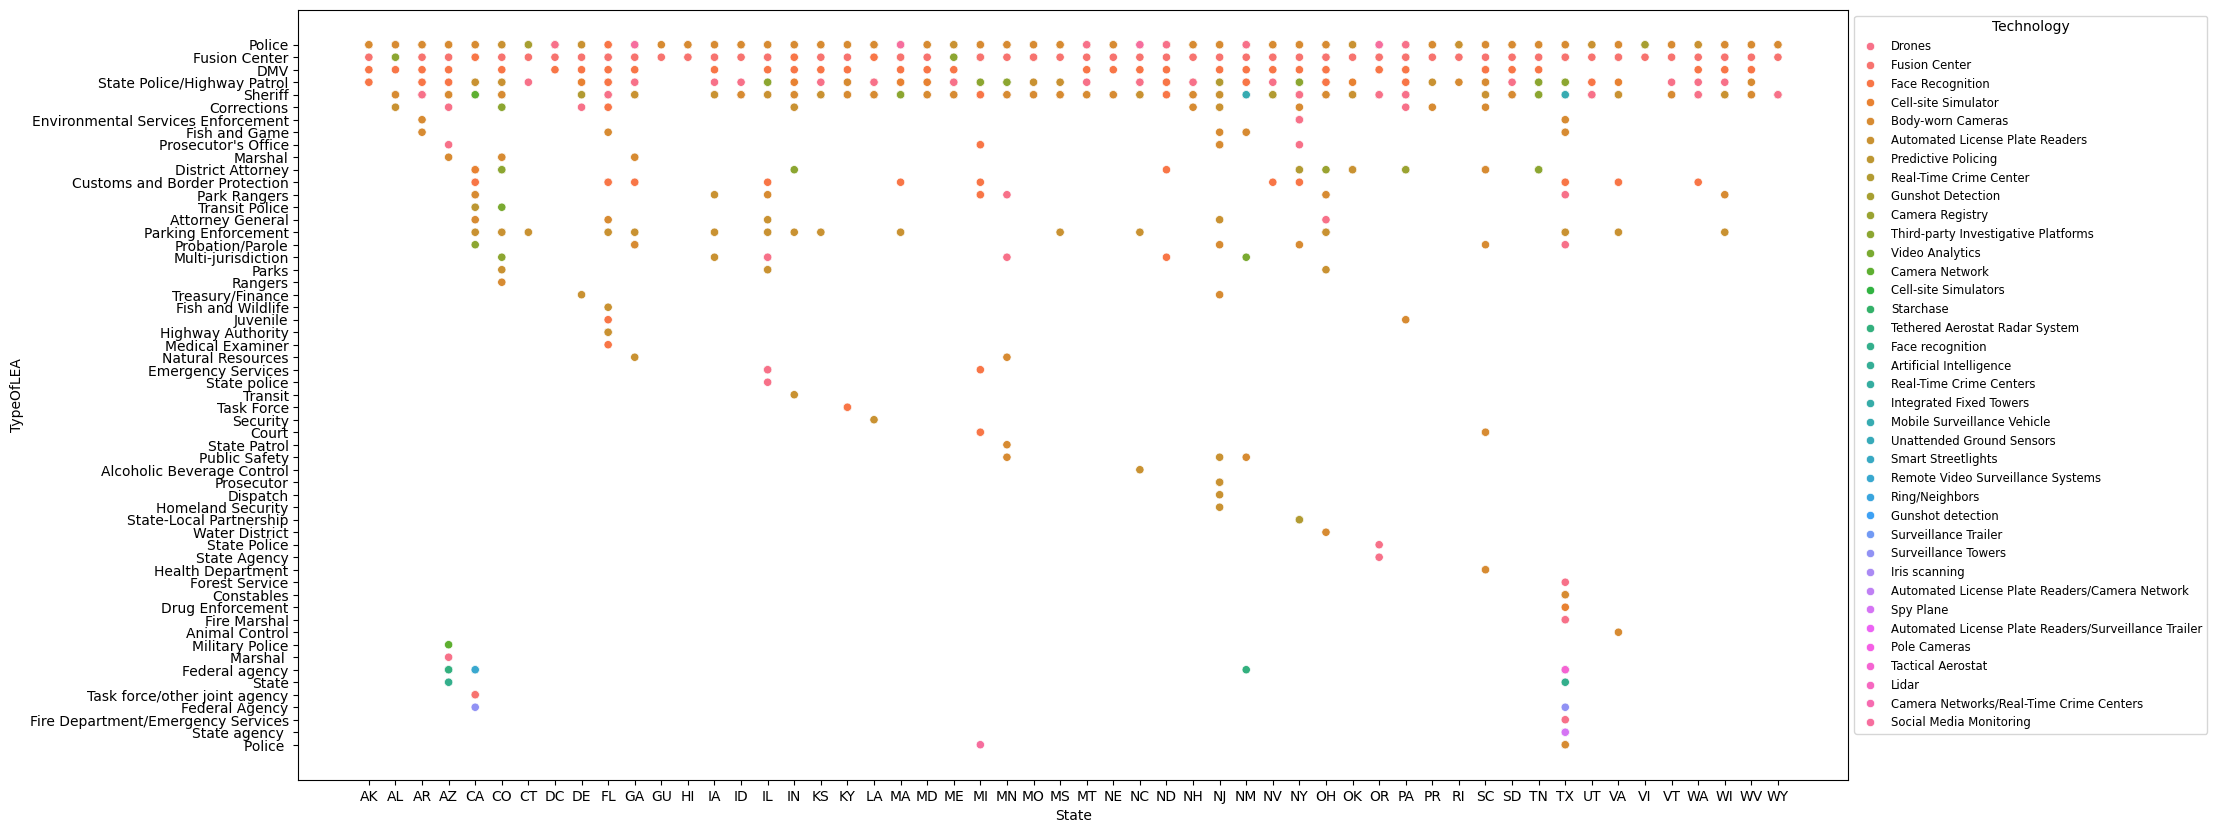

In [60]:
plt.figure(figsize=[20,10])
plt.tight_layout()
sns.scatterplot(data=df_aos_combined, x= 'State', y='TypeOfLEA', hue='Technology')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Technology', fontsize='small')
plt.show()

In [61]:
np.sort(df_aos_combined['TypeOfLEA'].unique())

array(['Alcoholic Beverage Control', 'Animal Control', 'Attorney General',
       'Constables', 'Corrections', 'Court',
       'Customs and Border Protection', 'DMV', 'Dispatch',
       'District Attorney', 'Drug Enforcement', 'Emergency Services',
       'Environmental Services Enforcement', 'Federal Agency',
       'Federal agency', 'Fire Department/Emergency Services',
       'Fire Marshal', 'Fish and Game', 'Fish and Wildlife',
       'Forest Service', 'Fusion Center', 'Health Department',
       'Highway Authority', 'Homeland Security', 'Juvenile', 'Marshal',
       'Marshal ', 'Medical Examiner', 'Military Police',
       'Multi-jurisdiction', 'Natural Resources', 'Park Rangers',
       'Parking Enforcement', 'Parks', 'Police', 'Police ',
       'Probation/Parole', 'Prosecutor', "Prosecutor's Office",
       'Public Safety', 'Rangers', 'Security', 'Sheriff', 'State',
       'State Agency', 'State Patrol', 'State Police',
       'State Police/Highway Patrol', 'State agency ', 'Sta

In [62]:
pd.crosstab(df_aos_combined['TypeOfLEA'], df_aos_combined['Technology'])

Technology,Artificial Intelligence,Automated License Plate Readers,Automated License Plate Readers/Camera Network,Automated License Plate Readers/Surveillance Trailer,Body-worn Cameras,Camera Network,Camera Networks/Real-Time Crime Centers,Camera Registry,Cell-site Simulator,Cell-site Simulators,Drones,Face Recognition,Face recognition,Fusion Center,Gunshot Detection,Gunshot detection,Integrated Fixed Towers,Iris scanning,Lidar,Mobile Surveillance Vehicle,Pole Cameras,Predictive Policing,Real-Time Crime Center,Real-Time Crime Centers,Remote Video Surveillance Systems,Ring/Neighbors,Smart Streetlights,Social Media Monitoring,Spy Plane,Starchase,Surveillance Towers,Surveillance Trailer,Tactical Aerostat,Tethered Aerostat Radar System,Third-party Investigative Platforms,Unattended Ground Sensors,Video Analytics
TypeOfLEA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alcoholic Beverage Control,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Animal Control,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Attorney General,0,2,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Constables,0,2,0,0,5,0,0,0,0,0,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Corrections,0,3,0,0,7,0,0,0,0,0,4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0
Court,0,0,0,0,16,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Customs and Border Protection,0,0,0,0,0,0,0,0,0,0,0,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
DMV,0,1,0,0,0,0,0,0,0,0,1,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Dispatch,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


There is so much data, it's very had to visualize or analyze.  Let's look at just California.
How many agencies do we have data for in California?

In [63]:
ca_agencies = df_aos_combined[df_aos_combined['State']== 'CA']['Agency']
print(len(ca_agencies.unique()))
print(ca_agencies)
ca_agencies.value_counts()

494
568                              Alameda Police Department
569                               Albany Police Department
570                             Berkeley Police Department
571                           Emeryville Police Department
572                              Fremont Police Department
                               ...                        
15418    University of California, Davis Police Department
15419    University of California, Riverside Police Dep...
15473    University of Southern California Department o...
15474    University of Southern California Department o...
15500      Universty of Californa, Davis Police Department
Name: Agency, Length: 1167, dtype: object


Agency
San Diego Police Department                16
Los Angeles County Sheriff's Department    12
Los Angeles Police Department              10
Chula Vista Police Department               8
Long Beach Police Department                8
                                           ..
Tuolumne County Sheriff's Office            1
Sonora Police Department                    1
Dinuba Police Department                    1
Woodlake Police Department                  1
Dublin Police Department                    1
Name: count, Length: 494, dtype: int64

What technologies are used by each agency?

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [64]:
# # to get all rows to show, force pandas not to redact
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_colwidth', None)

# pd.DataFrame({
#     'aosDtypes': df_aos.dtypes,
#     'alprDtypes': df_alpr_data.dtypes,
#     'borderDtypes': df_aos_brdr.dtypes,
#     'collegeDtypes': df_schol_srv.dtypes
# })

# # list is really long, not sure if that was really useful after all

In [65]:
print(df_aos['State'].unique())
len(df_aos['State'].unique())

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NE' 'NC' 'ND' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY']


54

Which states are represented in each dataset?

In [66]:
aos_states = np.sort(df_aos['State'].unique())
alpr_states = np.sort(df_alpr_data['State'].unique())
brdr_states = np.sort(df_aos_brdr['State'].unique())
schol_states = np.sort(df_schol_srv['State'].unique())

print("aos states: ", aos_states, "\n\nalpr states: ", alpr_states, "\n\nborder states: ", brdr_states, "\n\ncollege states: ", schol_states)

aos states:  ['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'GU' 'HI' 'IA'
 'ID' 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT'
 'NC' 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'PR' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'VI' 'VT' 'WA' 'WI' 'WV' 'WY'] 

alpr states:  ['AL' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'IA' 'IL' 'IN' 'KS' 'LA' 'MD' 'MI'
 'MN' 'MO' 'NJ' 'NY' 'OH' 'OR' 'PA' 'TX' 'US' 'WA'] 

border states:  ['AZ' 'CA' 'NM' 'TX'] 

college states:  ['AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'FL' 'GA' 'IA' 'IL' 'IN' 'KS' 'KY' 'LA'
 'MA' 'MD' 'MI' 'MO' 'MS' 'NC' 'ND' 'NE' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OR'
 'PA' 'SC' 'SD' 'TN' 'TX' 'UT' 'VA' 'WI' 'WY']


It looks like the border states dataset has the fewest states. That makes sense since it consists of only southern border states.
Do all of the other databases contain those four states? 

In [67]:
# states in the border state data also in the alpr data
print("border & alpr " ,np.sort(df_alpr_data[df_alpr_data['State'].isin(brdr_states)]['State'].unique()))
# states in the border state data also in the aos data
print("border & aos ", np.sort(df_aos[df_aos['State'].isin(brdr_states)]['State'].unique()))
# states in the border state data also in the college data
print("border & college ", np.sort(df_schol_srv[df_schol_srv['State'].isin(brdr_states)]['State'].unique()))

border & alpr  ['AZ' 'CA' 'TX']
border & aos  ['AZ' 'CA' 'NM' 'TX']
border & college  ['AZ' 'CA' 'NM' 'TX']


So at this point, do we narrow down the states we use to only those in the border state data, or do we drop the border state dataset and do analysis on the other 3 datasets?
How much data does each method leave us with?

-------------------------------------------------------------------------------------------------------
<center> ALPR

-------------------------------------------------------------------------------------------------------

Do the other dataframes reference ALPR as a method of surveilance used? 

In [68]:
print("AOS ", df_aos_combined['Technology'].value_counts())
print("\nCollege ",df_schol_srv['Technology'].value_counts())

AOS  Technology
Body-worn Cameras                                       5536
Automated License Plate Readers                         4184
Drones                                                  1805
Third-party Investigative Platforms                     1104
Face Recognition                                         995
Camera Registry                                          775
Gunshot Detection                                        266
Real-Time Crime Center                                   242
Predictive Policing                                      207
Video Analytics                                           92
Fusion Center                                             92
Cell-site Simulator                                       91
Social Media Monitoring                                   21
Mobile Surveillance Vehicle                               14
Camera Network                                            14
Remote Video Surveillance Systems                          7
Spy Plan

Automated License plate readers appear to make up a significant amount of the data, so it should still be considered.

Since the AOS border county data is provided from the same source and similar heading of the AOS dataset, is it acutally a subset? 

What counties are in the border counties data?

In [69]:
# brdr_counties = df_aos_brdr['County'].unique()
# brdr_counties

Some of the counties are duplicated because of trailing spaces.  Let's trim them. 

In [70]:
# df_aos_brdr['County'] = df_aos_brdr['County'].str.strip()

In [71]:
# brdr_counties = df_aos_brdr['County'].unique()
# brdr_counties

Duplicates are gone now, and leading and trailing spaces are gone.  

Do the counties in the AOS df also have this problem? Let's take a quick look at the Texas Counties, since we saw a couple in the brdr data that did. 

In [72]:
# df_aos[df_aos['State']=='TX']['Counties'].unique()
# len(df_aos[df_aos['State']=='TX']['Counties'].unique())

It does not appear that these have trailing spaces.  

In [73]:
# df_aos['Counties'] = df_aos['Counties'].str.strip()

In [74]:
# #Lets look again and see if anything changed
# df_aos[df_aos['State']=='TX']['Counties'].unique()
# len(df_aos[df_aos['State']=='TX']['Counties'].unique())


I had to split list in "Counties" to multiple county columns, County1, County2, up to County7.  In order to compare I want to see what is the max# of County rows I need to include.
Using value_counts() instead of unique() for this will give me a list of the values so I can see which value returned has the longest list of Counties, so then I will know how many County columns to include in comparison. 

In [75]:
# df_aos[df_aos['State'].isin(brdr_states)]['Counties'].value_counts()

The aos data contains more than just the border counties.  That makes sense.  Look at the aos data for just the state and counties included in the border counties data.

We can also easily see that the longest list returned from the "Counties" column of the aos dataset is 4.  So when comparing, I need to include the columns for County1 through County4 of the aos data to see if the border counties are included.

In [76]:
# # df_aos[(df_aos['State'].isin(brdr_states)) & 
# #brdr_cnty_mask = (df_aos['County1'].isin(brdr_counties)) | (df_aos['County2'].isin(brdr_counties)) | (df_aos['County3'].isin(brdr_counties)) | (df_aos['County4'].isin(brdr_counties)) #]
# # this logic is long, but I can't think of a more concise but also clear way to do it
# df_aos_ctycontymatch_brdr = df_aos[(df_aos['State'].isin(brdr_states)) & (df_aos['County1'].isin(brdr_counties)) | (df_aos['County2'].isin(brdr_counties)) | (df_aos['County3'].isin(brdr_counties)) | (df_aos['County4'].isin(brdr_counties))]
# df_aos_ctycontymatch_brdr.head(1)

In [77]:
# df_aos_brdr.head(1)

Which columns do the two dataframes have in common?

In [78]:
# df_aos_ctycontymatch_brdr.head(0)

In [79]:
# df_aos_brdr.head(0)

City, Border County will be in AOS County1 - County4, Agency=Agency, AOS TypeOfLEA = brdr LEAType   AOS TypeOfJuris = brdr JurisdictionType AOS Technology = brdr TechnologyType  AOS Vendor = brder Vendor AOS Summary = brder Summary

All the rest is descriptive text will not be useful for what we are comparing right now

In [80]:
# aos_cols = ['County1', 'County2', 'County3', 'County4', 'State', 'Agency', 'TypeOfLEA', 'TypeOfJuris', 'Technology', 'Vendor' ,'Summary']
# brdr_cols = ['County', 'State', 'Agency', 'LEAType', 'JurisdictionType',  'TechnologyType', 'Vendor', 'Summary' ]

In [81]:
# df_aos_sm = df_aos_ctycontymatch_brdr[aos_cols]
# df_aos_sm.head(1)

In [82]:
# df_aos_brdr_sm = df_aos_brdr[brdr_cols]
# df_aos_brdr_sm.head(1)

In [83]:
# df_aos_sm.info()

It doesnt look like any of our matching counties were in a County2+ position, so let's go ahead and drop these from our small df and then rename the column County to match the border df.  We are ok to drop, because this is just the copy. 

In [84]:
# df_aos_sm = df_aos_sm.drop(['County2', 'County3', 'County4'], axis=1)

In [85]:
# df_aos_sm = df_aos_sm.rename(columns = {'County1' : 'County'})
# df_aos_sm.head(1)

In [86]:
# df_aos_brdr_sm.info()

Looking at the summary sections in the data viewer, they are the most unique.  Let's take a look at them for one county for each and see how similar or different they are.  (Because they are many sentences of text, I am not sure they can be accuratley compared with == or .isequal unless they are EXACTLY the same and truly just duplicated data.  Checking feasibility of a comparison with one of these methods. 

For this quick check, I would like to look at a county with a small number of records to see if they are duplicates. 

In [87]:
# df_aos_brdr_sm['County'].value_counts()

Let's try Val Verde County.  It has 5 records in the border dataset, that give us a decent chance of having a duplicate without having to review too much data

Now let's compare to the aos data.

There are some duplicate summaries. Let's see if the whole record is the same. brd 185 = aos 13725 brd 186 = 13726 